# Group Comparisons

#### import packages

In [16]:
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [8]:
# Load the data
data_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(data_path)
df

,participantID,age,sex,group,condition,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,key_resp.rt,correct
0,Sub-007,23.0,2.0,1.0,happy_happy,0,0,0,0,14,1,0,0,0,0.573668,90.909091
1,Sub-007,23.0,2.0,1.0,happy_sad,0,0,1,6,8,0,0,0,0,0.688039,92.307692
2,Sub-007,23.0,2.0,1.0,sad_happy,0,0,0,0,15,0,0,0,0,0.696108,100.000000
3,Sub-007,23.0,2.0,1.0,sad_sad,0,0,2,3,10,0,0,0,0,0.594425,100.000000
4,Sub-008,19.0,1.0,1.0,happy_happy,0,0,1,0,3,6,2,3,0,0.815579,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,Sub-130,20.0,1.0,1.0,sad_sad,0,0,0,6,9,0,0,0,0,0.654450,100.000000
480,Sub-131,22.0,2.0,1.0,happy_happy,0,0,0,1,2,9,2,1,0,0.815622,100.000000
481,Sub-131,22.0,2.0,1.0,happy_sad,0,1,7,4,3,0,0,0,0,0.798792,100.000000
482,Sub-131,22.0,2.0,1.0,sad_happy,0,0,0,0,4,6,3,2,0,0.819602,90.000000


In [24]:
# Load the provided dataset
file_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(file_path)

# Transforming Reaction Time Data
rt_data = df[['participantID', 'group', 'condition', 'key_resp.rt']].dropna()
rt_data.columns = ['Participant', 'Group', 'Condition', 'ReactionTime']

# Transforming Accuracy Data
accuracy_data = df[['participantID', 'group', 'condition', 'correct']].dropna()
accuracy_data.columns = ['Participant', 'Group', 'Condition', 'Accuracy']

# Save the transformed data to CSV files
rt_data.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/reaction_times_long_format.csv', index=False)
accuracy_data.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/accuracy_long_format.csv', index=False)

print("Transformed reaction time data saved as 'reaction_times_long_format.csv'")
print("Transformed accuracy data saved as 'accuracy_long_format.csv'")


Transformed reaction time data saved as 'reaction_times_long_format.csv'
Transformed accuracy data saved as 'accuracy_long_format.csv'


In [26]:
import pandas as pd

# Load the provided dataset
file_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(file_path)

# Transforming Reaction Time Data
# Create a new column that combines condition and group
df['Condition_Group'] = df['condition'] + '_' + df['group'].map({1: 'MDD', 2: 'HC'})

# Pivot the data
rt_pivot = df.pivot_table(index='participantID', columns='Condition_Group', values='key_resp.rt')

# Reset index to get 'Participant' as a column
rt_pivot.reset_index(inplace=True)

# Save the transformed reaction time data
rt_pivot.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/reaction_times_pivot_format.csv', index=False)

# Transforming Accuracy Data
# Pivot the data
accuracy_pivot = df.pivot_table(index='participantID', columns='Condition_Group', values='correct')

# Reset index to get 'Participant' as a column
accuracy_pivot.reset_index(inplace=True)

# Save the transformed accuracy data
accuracy_pivot.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/accuracy_pivot_format.csv', index=False)

print("Transformed reaction time data saved as 'reaction_times_pivot_format.csv'")
print("Transformed accuracy data saved as 'accuracy_pivot_format.csv'")


Transformed reaction time data saved as 'reaction_times_pivot_format.csv'
Transformed accuracy data saved as 'accuracy_pivot_format.csv'


In [28]:

# Load the provided dataset
file_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(file_path)

# Map group to readable strings
df['group'] = df['group'].map({1: 'MDD', 2: 'HC'})

# Split data into HC and MDD
df_hc = df[df['group'] == 'HC']
df_mdd = df[df['group'] == 'MDD']

# Pivot the data for each group
pivot_hc = df_hc.pivot_table(index='participantID', columns='condition', values='key_resp.rt')
pivot_mdd = df_mdd.pivot_table(index='participantID', columns='condition', values='key_resp.rt')

# Rename columns to include group information
pivot_hc.columns = [f"{col}_HC" for col in pivot_hc.columns]
pivot_mdd.columns = [f"{col}_MDD" for col in pivot_mdd.columns]

# Reset index to get 'Participant' as a column
pivot_hc.reset_index(inplace=True)
pivot_mdd.reset_index(inplace=True)

# Concatenate the two groups
combined_pivot = pd.concat([pivot_hc, pivot_mdd], axis=1)

# Save the transformed reaction time data
combined_pivot.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/reaction_times_grouped_format.csv', index=False)

# Repeat for accuracy data
# Pivot the data for each group
pivot_hc_accuracy = df_hc.pivot_table(index='participantID', columns='condition', values='correct')
pivot_mdd_accuracy = df_mdd.pivot_table(index='participantID', columns='condition', values='correct')

# Rename columns to include group information
pivot_hc_accuracy.columns = [f"{col}_HC" for col in pivot_hc_accuracy.columns]
pivot_mdd_accuracy.columns = [f"{col}_MDD" for col in pivot_mdd_accuracy.columns]

# Reset index to get 'Participant' as a column
pivot_hc_accuracy.reset_index(inplace=True)
pivot_mdd_accuracy.reset_index(inplace=True)

# Concatenate the two groups
combined_pivot_accuracy = pd.concat([pivot_hc_accuracy, pivot_mdd_accuracy], axis=1)

# Save the transformed accuracy data
combined_pivot_accuracy.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/accuracy_grouped_format.csv', index=False)

print("Transformed reaction time data saved as 'reaction_times_grouped_format.csv'")
print("Transformed accuracy data saved as 'accuracy_grouped_format.csv'")


Transformed reaction time data saved as 'reaction_times_grouped_format.csv'
Transformed accuracy data saved as 'accuracy_grouped_format.csv'


#### Slider Response 

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

# Load the data
data_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(data_path)

# Slider Response Analysis
# Columns representing the slider ratings
slider_cols = ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']

# Reshape data to long format for ANOVA and visualization
slider_data = df.melt(id_vars=['participantID', 'group', 'condition'], value_vars=slider_cols, var_name='Rating', value_name='Count')

# Convert Rating to numeric
slider_data['Rating'] = slider_data['Rating'].astype(float)

# Convert group to categorical with labels
slider_data['group'] = slider_data['group'].replace({1: 'MDD', 2: 'HC'})

# Aggregate the data by averaging counts for each participant, group, condition, and rating
aggregated_slider_data = slider_data.groupby(['participantID', 'group', 'condition', 'Rating'], as_index=False)['Count'].mean()

aggregated_slider_data.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/slider_rating.csv', index=False)


Plot


                           sum_sq     df         F    PR(>F)
C(condition)             0.008475    3.0  0.001465  0.999922
C(group)                 9.228814    1.0  4.786813  0.029177
C(condition):C(group)    0.008475    3.0  0.001465  0.999922
Residual               894.576271  464.0       NaN       NaN


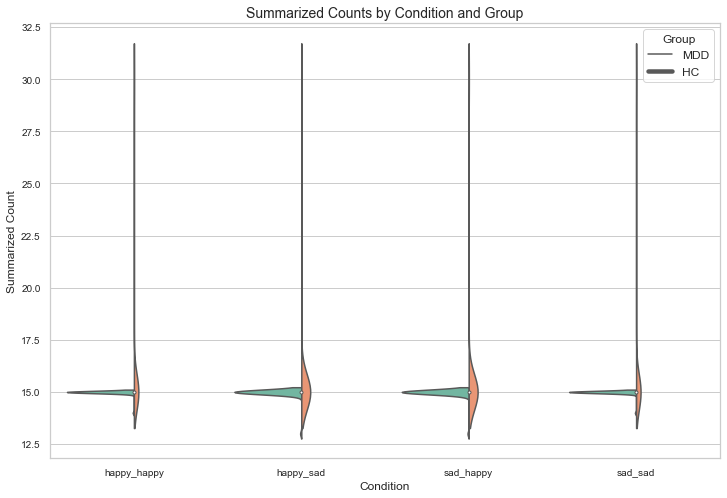

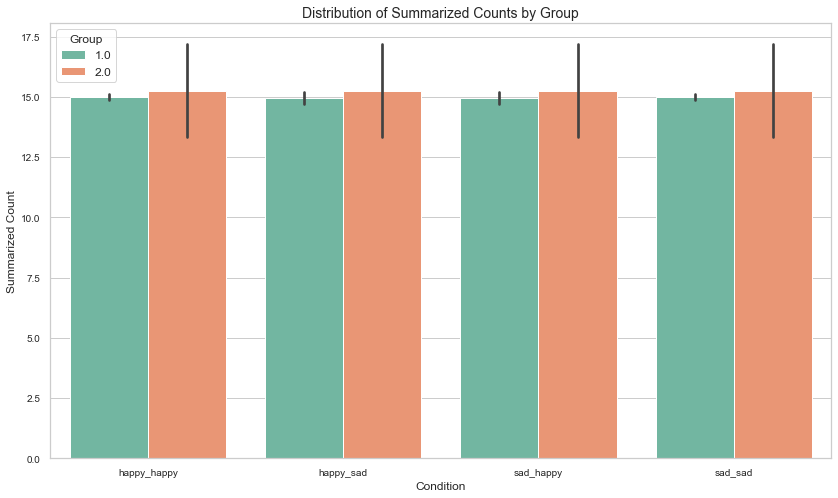

Analyzing condition: happy_happy
              sum_sq     df         F    PR(>F)
C(group)    2.169492    1.0  1.132743  0.289401
Residual  222.169492  116.0       NaN       NaN
Analyzing condition: happy_sad
              sum_sq     df         F    PR(>F)
C(group)    2.449153    1.0  1.262009  0.263591
Residual  225.118644  116.0       NaN       NaN
Analyzing condition: sad_happy
              sum_sq     df         F    PR(>F)
C(group)    2.449153    1.0  1.262009  0.263591
Residual  225.118644  116.0       NaN       NaN
Analyzing condition: sad_sad
              sum_sq     df         F    PR(>F)
C(group)    2.169492    1.0  1.132743  0.289401
Residual  222.169492  116.0       NaN       NaN


In [37]:

# Load the dataset
data_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(data_path)

# Melt the data to long format for analysis
slider_cols = ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']
slider_data = df.melt(id_vars=['participantID', 'age', 'sex', 'group', 'condition'], value_vars=slider_cols, var_name='Rating', value_name='Count')

# Convert Rating to numeric
slider_data['Rating'] = slider_data['Rating'].astype(float)

# Aggregate the data by averaging counts for each participant, group, and condition
aggregated_slider_data = slider_data.groupby(['participantID', 'group', 'condition', 'Rating'], as_index=False)['Count'].mean()

# Summarize counts across ratings to compare conditions and groups
condition_group_summary = aggregated_slider_data.groupby(['participantID', 'group', 'condition'], as_index=False)['Count'].sum()

# Perform two-way ANOVA for the summarized counts
model = ols('Count ~ C(condition) * C(group)', data=condition_group_summary).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

# Initialize stars dictionary
stars = {}

# Perform post hoc tests if ANOVA is significant
if aov_table['PR(>F)'][0] < 0.05:
    posthoc = pairwise_tukeyhsd(condition_group_summary['Count'], condition_group_summary['condition'])
    print(posthoc)
    
    # Correct for multiple comparisons using Holm-Bonferroni method
    pvals = posthoc.pvalues
    _, corrected_pvals, _, _ = multipletests(pvals, method='holm')
    
    # Extract the summary data to add significance stars to the plot
    for i, row in enumerate(posthoc.summary().data[1:]):
        pair = (row[0], row[1])
        pval = corrected_pvals[i]
        if pval < 0.001:
            stars[pair] = '***'
        elif pval < 0.01:
            stars[pair] = '**'
        elif pval < 0.05:
            stars[pair] = '*'
        else:
            stars[pair] = ''

# Set plot style for scientific publication
sns.set(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})

# Plot the summarized count results as violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=condition_group_summary, x='condition', y='Count', hue='group', palette='Set2', split=True)
plt.title('Summarized Counts by Condition and Group')
plt.xlabel('Condition')
plt.ylabel('Summarized Count')
plt.legend(title='Group', labels=['MDD', 'HC'])

# Add significance stars to the plot
if stars:
    for pair, star in stars.items():
        if star:
            cond1, cond2 = pair
            cond1_idx = condition_group_summary['condition'].unique().tolist().index(cond1)
            cond2_idx = condition_group_summary['condition'].unique().tolist().index(cond2)
            y_max = condition_group_summary['Count'].max() + 1
            plt.plot([cond1_idx, cond2_idx], [y_max, y_max], 'k-')
            plt.text((cond1_idx + cond2_idx) * .5, y_max, star, ha='center', va='bottom', color='k')

plt.show()

# Plot distribution of summarized counts per condition as bar plots separated by group
def plot_summarized_count_distributions_group(data, title):
    plt.figure(figsize=(14, 8))
    sns.barplot(data=data, x='condition', y='Count', hue='group', ci='sd', palette='Set2')
    plt.title(title)
    plt.xlabel('Condition')
    plt.ylabel('Summarized Count')
    plt.legend(title='Group')
    plt.show()

plot_summarized_count_distributions_group(condition_group_summary, 'Distribution of Summarized Counts by Group')

# Analysis comparing conditions between groups using two-way ANOVA for each condition
for condition in condition_group_summary['condition'].unique():
    print(f"Analyzing condition: {condition}")
    condition_data = condition_group_summary[condition_group_summary['condition'] == condition]
    model = ols('Count ~ C(group)', data=condition_data).fit()
    aov_table = anova_lm(model, typ=2)
    print(aov_table)

    # Perform post hoc tests if ANOVA is significant
    if aov_table['PR(>F)'][0] < 0.05:
        posthoc = pairwise_tukeyhsd(condition_data['Count'], condition_data['group'])
        print(posthoc)
        
        # Correct for multiple comparisons using Holm-Bonferroni method
        pvals = posthoc.pvalues
        _, corrected_pvals, _, _ = multipletests(pvals, method='holm')
        
        # Extract the summary data to add significance stars to the plot
        for i, row in enumerate(posthoc.summary().data[1:]):
            pair = (row[0], row[1])
            pval = corrected_pvals[i]
            if pval < 0.001:
                stars[pair] = '***'
            elif pval < 0.01:
                stars[pair] = '**'
            elif pval < 0.05:
                stars[pair] = '*'
            else:
                stars[pair] = ''


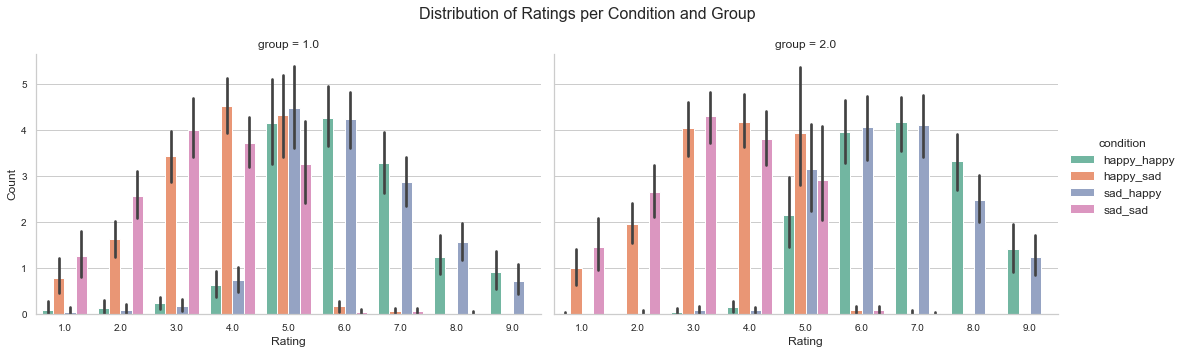

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/ratings_by_condition_and_participant.csv'
df = pd.read_csv(data_path)

# Melt the data to long format for analysis
slider_cols = ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']
slider_data = df.melt(id_vars=['participantID', 'age', 'sex', 'group', 'condition'], value_vars=slider_cols, var_name='Rating', value_name='Count')

# Convert Rating to numeric
slider_data['Rating'] = slider_data['Rating'].astype(float)

# Aggregate the data by averaging counts for each participant, group, condition, and rating
aggregated_slider_data = slider_data.groupby(['participantID', 'group', 'condition', 'Rating'], as_index=False)['Count'].mean()

# Set plot style for scientific publication
sns.set(style="whitegrid")
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 12,
    'figure.titlesize': 16
})

# Plot distribution of ratings per condition and per group
g = sns.catplot(
    data=aggregated_slider_data, 
    x='Rating', 
    y='Count', 
    hue='condition', 
    col='group', 
    kind='bar', 
    height=5, 
    aspect=1.5, 
    palette='Set2'
)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Ratings per Condition and Group')
plt.show()

#group 1 = MDD
#group 2 = HC